In [1]:
from qiskit import QuantumCircuit
from transpile_benchy.utilities.numerical_decomp import BasicDecomposer
import numpy as np
from qiskit.circuit.library import RZXGate
from quantum_logical.interaction import ConversionGainInteraction
from qiskit.circuit import Gate
from qiskit.circuit.library import UGate, iSwapGate

/home/evm9/quantum_logical/.venv/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


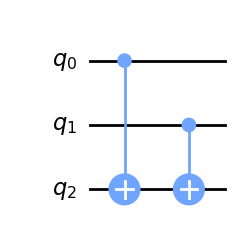

In [2]:
target_qc = QuantumCircuit(3)
target_qc.cx(0, 2)
target_qc.cx(1, 2)
target_qc.draw(output="mpl")

In [3]:
class basis_gate(Gate):
    def __init__(self, gc, gg, t=1.0):
        super().__init__("2Q", 2, [gc, gg, t])

    def __array__(self, dtype=None):
        H = ConversionGainInteraction(*self.params)
        return H.construct_U(t=1.0).full()

In [4]:
sqrtiswap = lambda: iSwapGate().power(1 / 2)

In [5]:
# basis gates are tuples of (gate, num_params)
# NOTE, basis gate is only parameterized if considering a continuous basis set
# basis_gates = [(RZXGate, 1), (CCXGate, 0)]

# basis_gates = [(basis_gate, 2)] # TOO EXPENSIVE!
basis_gates = [(sqrtiswap, 0)]

decomposer = BasicDecomposer(basis_gates)
decomposer.convergence_threshold = 1e-8
ansatz = decomposer(target_qc)
print(ansatz)
ansatz.draw("mpl")